In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
points = 30000  # number of time bins
last = 2  # time in sec
dt = last / points
t = np.linspace(0, last, num=points)
x = np.zeros(points)
def mycurve(x0, h):
    y = x.copy()
    y[0] = x0
    for i in range(1,len(y)):
        y[i] = y[i-1] - 2*h*np.sinh(y[i-1]) * dt
    return y    

In [6]:
# plt.figure()
# lim=30000
# plt.plot(t[0:lim], mycurve(.1)[0:lim],
#          t[0:lim], mycurve(.2)[0:lim],
#          t[0:lim], mycurve(.5)[0:lim],
#          t[0:lim], mycurve(1)[0:lim],
#          t[0:lim], mycurve(2)[0:lim],
#          t[0:lim], mycurve(3)[0:lim],
#          t[0:lim], mycurve(4)[0:lim])
# # plt.legend(['h=0.1','h=0.2','h=0.5','h=1', 'h=2','h=3','h=4'])
# plt.ylabel('evidence')
# plt.xlabel('time')
# plt.title('forgetting for h = 1 Hz')
# plt.show()

In [7]:
def halflife(x0, h):
    y = x.copy()
    y[0] = x0
    time = 0
    for i in range(1,len(y)):
        y[i] = y[i-1] - 2*h*np.sinh(y[i-1]) * dt
        if y[i] < (x0 / 2):
            time = i * dt
            break
    return time

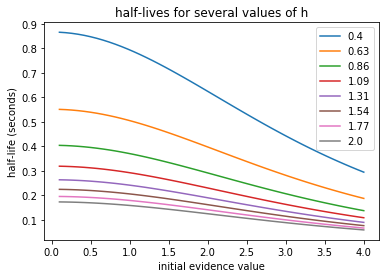

In [12]:
fig, ax = plt.subplots()
init_values = np.linspace(0.1,4)
h_values = np.linspace(0.4,2, num=8)
for h in h_values:
    half_lives = np.array([halflife(init_values[i], h) for i in range(len(init_values))])
    ax.plot(init_values, half_lives)
ax.legend([str(round(float(h),2)) for h in h_values])
plt.ylabel('half-life (seconds)')
plt.xlabel('initial evidence value')
plt.title('half-lives for several values of h')
plt.show()